In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [64]:
# import pandas as pd
# import zipfile

# # Specify the path to your zip file
# zip_file_path = '/content/drive/MyDrive/ME793/odor.csv.zip'

# # Extract the CSV file from the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # Assuming there is only one CSV file in the zip, get its name
#     csv_file_name = zip_ref.namelist()[0]

#     # Extract the CSV file
#     zip_ref.extract(csv_file_name)

# # Read the extracted CSV file into a DataFrame
# df = pd.read_csv(csv_file_name)
df = pd.read_csv('E:\IITB\SEM8\ME793\Drug Discovery\Drug-Discovery\dfn.csv')
# Now you have your DataFrame ready for use
df.head() # Display the first few rows of the DataFrame


,smiles,logP,logP_class,image_path
0,C[C@H](Cc1ccccc1F)C(=O)N[C@@H](CC(N)=O)C1CCCCC1,2.94480,3,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
1,Cc1nn(CC(C)C)c2sc(C(=O)N[C@H](C)c3ccccc3)cc12,4.55322,5,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
2,C[C@@H](NCc1c[nH+]cn1C1CC1)c1cccnc1,1.88290,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
3,O=C(NCc1ccccc1)c1csc(-n2cccc2)n1,2.86380,3,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
4,CC[C@@H](NC(=O)c1ccc(CN2C(=O)CCC2=O)cc1)c1ccc(...,3.97920,5,E:\IITB\SEM8\ME793\Drug Discovery\images\image...


In [61]:
df = df.iloc[:, :2]

# Now you have the DataFrame with only the first two columns
df.head()

,smiles,logP
0,C[C@H](Cc1ccccc1F)C(=O)N[C@@H](CC(N)=O)C1CCCCC1,2.94480
1,Cc1nn(CC(C)C)c2sc(C(=O)N[C@H](C)c3ccccc3)cc12,4.55322
2,C[C@@H](NCc1c[nH+]cn1C1CC1)c1cccnc1,1.88290
3,O=C(NCc1ccccc1)c1csc(-n2cccc2)n1,2.86380
4,CC[C@@H](NC(=O)c1ccc(CN2C(=O)CCC2=O)cc1)c1ccc(...,3.97920


In [ ]:
from collections import Counter

# Split the descriptors into individual components
all_descriptors = df['descriptors'].str.split(';')

# Flatten the list of lists into a single list
flat_descriptors = [descriptor for sublist in all_descriptors for descriptor in sublist]

# Count the occurrences of each unique descriptor
descriptor_counts = Counter(flat_descriptors)

# Sort the descriptors by count in descending order
sorted_descriptors = sorted(descriptor_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted descriptors and their counts
for descriptor, count in sorted_descriptors:
    print(f"{descriptor}: {count}")


fruity: 1902
green: 1446
sweet: 1429
floral: 1100
herbal: 756
woody: 679
fatty: 598
fresh: 533
waxy: 488
spicy: 464
sulfurous: 402
oily: 388
tropical: 386
citrus: 379
nutty: 366
rose: 332
earthy: 328
apple: 308
roasted: 305
meaty: 299
balsamic: 298
ethereal: 287
vegetable: 287
caramellic: 234
mint: 226
winey: 221
pineapple: 205
musty: 200
odorless: 200
pungent: 198
creamy: 190
cheesy: 187
burnt: 186
phenolic: 180
onion: 177
powdery: 167
dry: 166
honey: 157
berry: 156
fermented: 147
aldehydic: 144
buttery: 139
leafy: 139
metallic: 134
camphoreous: 132
melon: 132
pear: 130
savory: 128
banana: 128
alliaceous: 126
animal: 124
dairy: 123
garlic: 120
cocoa: 118
cognac: 112
vanilla: 111
coffee: 110
alcoholic: 105
sharp: 104
jasmin: 103
tobacco: 102
amber: 101
mushroom: 99
musk: 98
orange: 98
clean: 97
warm: 96
peach: 95
coconut: 91
grape: 91
rummy: 89
almond: 87
milky: 87
cooked: 87
anisic: 87
ripe: 87
cherry: 82
cooling: 81
lemon: 81
fishy: 78
pine: 78
apricot: 78
natural: 77
aromatic: 76
ha

In [ ]:
top_10_descriptors = [descriptor[0] for descriptor in sorted_descriptors[:10]]

# Filter the DataFrame to include only the rows with the top 5 descriptors
filtered_df = df[df['descriptors'].apply(lambda x: any(descriptor in x for descriptor in top_10_descriptors))]

# Replace the whole descriptor column with only the top descriptor for each row
for descriptor in top_10_descriptors:
    filtered_df.loc[filtered_df['descriptors'].str.contains(descriptor), 'descriptors'] = descriptor

filtered_df.reset_index(drop=True, inplace=True)
# Print the filtered DataFrame
print(filtered_df)

                                     nonStereoSMILES descriptors
0                                      CCC(=O)C(=O)O       sweet
1                                   O=C(O)CCc1ccccc1       sweet
2                                      OCc1ccc(O)cc1      fruity
3                                     O=Cc1ccc(O)cc1       sweet
4                                               CC=O      fruity
...                                              ...         ...
3974                CCCCCCCCCCCCCC(=O)CC(=O)OCC(O)CO       fatty
3975                   CC1=CCC2(CC1)C(C)CCC2C(C)(C)O      fruity
3976  CCCCCCC=CCCCCCCCC(=O)OCC=C(C)CCC=C(C)CCC=C(C)C       green
3977                         CCCCCC#CC(=O)OCc1ccccc1       green
3978                      C=C(C=CO)CCC=C(C)CCC=C(C)C      floral

[3979 rows x 2 columns]


<ipython-input-4-cf2ee068664f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['descriptors'].str.contains(descriptor), 'descriptors'] = descriptor


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 21.1 MB/s eta 0:00:00


In [7]:
import os
from rdkit import Chem
from rdkit.Chem import Draw

# Destination path where the images will be saved
destination_path = "/content/drive/MyDrive/ME793/Data"

# Create folders for each class (descriptor) if they don't exist
for descriptor in top_10_descriptors:
    class_folder = os.path.join(destination_path, descriptor)
    os.makedirs(class_folder, exist_ok=True)

# Function to convert SMILES to image and save in the respective class folder
def save_image(smiles, descriptor):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        image_path = os.path.join(destination_path, descriptor, f"{smiles}.png")
        Draw.MolToFile(mol, image_path)

# Iterate over each row in the filtered DataFrame and save the images
for index, row in filtered_df.iterrows():
    smiles = row['nonStereoSMILES']
    descriptor = row['descriptors']
    save_image(smiles, descriptor)


In [8]:
import os

# Define the path to the folder where the images are saved
image_folder = "/content/drive/MyDrive/ME793/Data"

# Function to generate file paths
def generate_file_path(smiles, descriptor):
    return os.path.join(image_folder, descriptor, f"{smiles}.png")

# Create a new column in the DataFrame containing the file paths
filtered_df['image_path'] = filtered_df.apply(lambda row: generate_file_path(row['nonStereoSMILES'], row['descriptors']), axis=1)


<ipython-input-8-b744e91462da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['image_path'] = filtered_df.apply(lambda row: generate_file_path(row['nonStereoSMILES'], row['descriptors']), axis=1)


In [65]:
df.drop(['logP'], axis=1, inplace=True)
df['logP_class'] = df["logP_class"] - 1

In [67]:
df.describe()

,logP_class
count,10000.000000
mean,1.993600
std,1.409382
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [68]:
# change the name of column
df.rename(columns = {'smiles':'nonStereoSMILES', 'logP_class':"class_number"}, inplace = True)

In [69]:
df

,nonStereoSMILES,class_number,image_path
0,C[C@H](Cc1ccccc1F)C(=O)N[C@@H](CC(N)=O)C1CCCCC1,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
1,Cc1nn(CC(C)C)c2sc(C(=O)N[C@H](C)c3ccccc3)cc12,4,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
2,C[C@@H](NCc1c[nH+]cn1C1CC1)c1cccnc1,1,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
3,O=C(NCc1ccccc1)c1csc(-n2cccc2)n1,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
4,CC[C@@H](NC(=O)c1ccc(CN2C(=O)CCC2=O)cc1)c1ccc(...,4,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
...,...,...,...
9995,COc1ccc(-c2c(NC(=O)c3cccs3)n(-c3ccc(C)cc3)nc(C...,4,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
9996,CCc1nnc(C[NH+](C)C[C@@H]2CCC[NH+]3CCCC[C@@H]23)o1,0,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
9997,CCC(CC)(CNC(=O)[C@H]1CSC(=O)N1)c1ccccc1,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
9998,CCC[NH+]1CCC(CNC(=O)Cc2ccc(C)c(O)c2)CC1,0,E:\IITB\SEM8\ME793\Drug Discovery\images\image...


In [70]:
filtered_df = df.copy()

In [73]:
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, dataframe, img_size, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.images = dataframe['image_path'].tolist()
        self.labels = dataframe['class_number'].tolist()

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        label = self.labels[idx]

        # Load image
        image = Image.open(image_path)

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label


In [74]:
img_size = 300 # Image size
batch_size = 64  # Batch size

# Model
z_size = 100
generator_layer_size = [256, 512, 1024]
discriminator_layer_size = [1024, 512, 256]

# Training
epochs = 30  # Train epochs
learning_rate = 1e-4

In [75]:
dataset = CustomDataset(filtered_df, img_size)

In [76]:
filtered_df

,nonStereoSMILES,class_number,image_path
0,C[C@H](Cc1ccccc1F)C(=O)N[C@@H](CC(N)=O)C1CCCCC1,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
1,Cc1nn(CC(C)C)c2sc(C(=O)N[C@H](C)c3ccccc3)cc12,4,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
2,C[C@@H](NCc1c[nH+]cn1C1CC1)c1cccnc1,1,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
3,O=C(NCc1ccccc1)c1csc(-n2cccc2)n1,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
4,CC[C@@H](NC(=O)c1ccc(CN2C(=O)CCC2=O)cc1)c1ccc(...,4,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
...,...,...,...
9995,COc1ccc(-c2c(NC(=O)c3cccs3)n(-c3ccc(C)cc3)nc(C...,4,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
9996,CCc1nnc(C[NH+](C)C[C@@H]2CCC[NH+]3CCCC[C@@H]23)o1,0,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
9997,CCC(CC)(CNC(=O)[C@H]1CSC(=O)N1)c1ccccc1,2,E:\IITB\SEM8\ME793\Drug Discovery\images\image...
9998,CCC[NH+]1CCC(CNC(=O)Cc2ccc(C)c(O)c2)CC1,0,E:\IITB\SEM8\ME793\Drug Discovery\images\image...


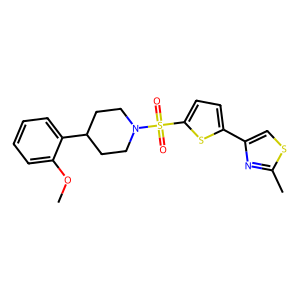

In [77]:
dataset[100][0]

In [78]:
# Define the new class list
class_list = ["very low", "low", "medium", "high", "very high"]

# Get the number of classes
class_num = len(class_list)

In [79]:
class_list[dataset[3000][1]]

'high'

In [80]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('torch version:',torch.__version__)
print('device:', device)

torch version: 2.0.0+cpu
device: cpu


In [81]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [82]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [83]:
import torch
from torchvision import transforms

# Define the transformation to convert PIL images to tensors
transform = transforms.Compose([
    transforms.ToTensor()
])

from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from PIL import Image, UnidentifiedImageError

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform if transform else ToTensor()

        # Initialize a list to store the paths of images causing errors
        self.error_image_paths = []

        # Check if each image file is valid and collect the error image paths
        for idx, row in self.dataframe.iterrows():
            try:
                image = Image.open(row['image_path']).convert('RGB')  # Open and convert to RGB
                image.verify()  # Verify image integrity
            except (UnidentifiedImageError, OSError):
                # If an error occurs, add the image path to the list of error image paths
                self.error_image_paths.append(row['image_path'])

    def __len__(self):
        return len(self.dataframe) - len(self.error_image_paths)

    def __getitem__(self, idx):
        # Adjust the index to handle error image paths
        if idx < len(self.error_image_paths):
            idx += len(self.error_image_paths)
        row = self.dataframe.iloc[idx]

        # Load image from file path
        try:
            image = Image.open(row['image_path']).convert('L')  # gray scale
            image.verify()  # Verify image integrity
        except (UnidentifiedImageError, OSError):
            # If an error occurs, skip this image and return the next valid one
            return self.__getitem__(idx + 1)

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, row['class_number']


# Create an instance of the custom dataset
custom_dataset = CustomDataset(filtered_df, transform=transform)

# Create a data loader from the custom dataset
data_loader = torch.utils.data.DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)


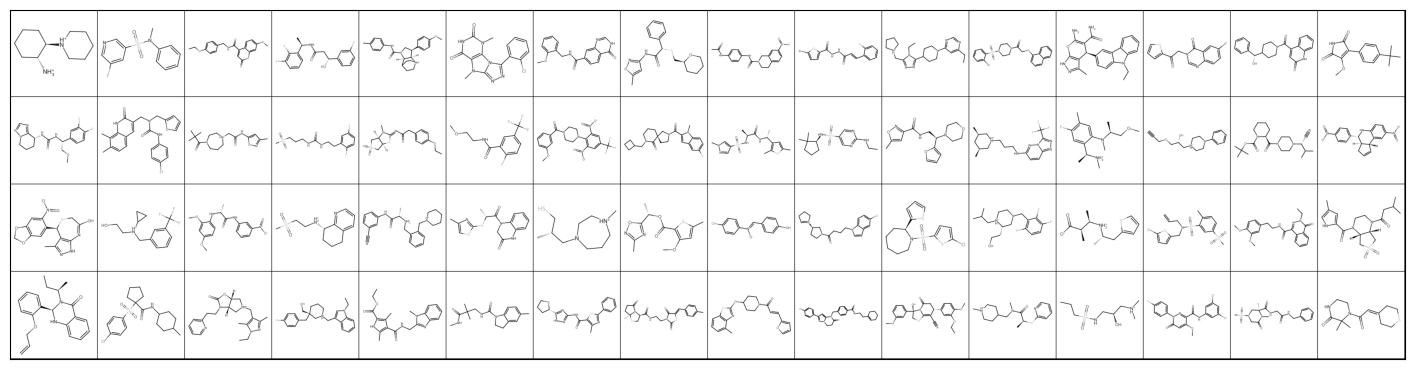

In [84]:
for images, labels in data_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

In [85]:
class Generator(nn.Module):
    def __init__(self, generator_layer_size, z_size, img_size, class_num):
        super().__init__()

        self.z_size = z_size
        self.img_size = img_size

        self.label_emb = nn.Embedding(class_num, class_num)

        self.model = nn.Sequential(
            nn.Linear(self.z_size + class_num, generator_layer_size[0]),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(generator_layer_size[0], generator_layer_size[1]),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(generator_layer_size[1], generator_layer_size[2]),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(generator_layer_size[2], self.img_size * self.img_size),
            nn.Tanh()
        )

    def forward(self, z, labels):

        # Reshape z
        z = z.view(-1, self.z_size)

        # One-hot vector to embedding vector
        c = self.label_emb(labels)

        # Concat image & label
        x = torch.cat([z, c], 1)

        # Generator out
        out = self.model(x)

        return out.view(-1, self.img_size, self.img_size)

In [86]:
class Discriminator(nn.Module):
    def __init__(self, discriminator_layer_size, img_size, class_num):
        super().__init__()

        self.label_emb = nn.Embedding(class_num, class_num)
        self.img_size = img_size

        self.model = nn.Sequential(
            nn.Linear(self.img_size * self.img_size + class_num, discriminator_layer_size[0]),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(discriminator_layer_size[0], discriminator_layer_size[1]),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(discriminator_layer_size[1], discriminator_layer_size[2]),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(discriminator_layer_size[2], 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):

        # Reshape fake image
        x = x.view(-1, self.img_size * self.img_size)

        # One-hot vector to embedding vector
        c = self.label_emb(labels)

        # Concat image & label
        x = torch.cat([x, c], 1)

        # Discriminator out
        out = self.model(x)

        return out.squeeze()

In [87]:
# Define generator
generator = Generator(generator_layer_size, z_size, img_size, class_num).to(device)
# Define discriminator
discriminator = Discriminator(discriminator_layer_size, img_size, class_num).to(device)

In [88]:
# Loss function
criterion = nn.BCELoss()

In [89]:
# Optimizer
g_optimizer = torch.optim.Adam(generator.parameters(), lr=learning_rate)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

In [90]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):

    # Init gradient
    g_optimizer.zero_grad()

    # Building z
    z = Variable(torch.randn(batch_size, z_size)).to(device)

    # Building fake labels
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, class_num, batch_size))).to(device)

    # Generating fake images
    fake_images = generator(z, fake_labels)

    # Disciminating fake images
    validity = discriminator(fake_images, fake_labels)

    # Calculating discrimination loss (fake images)
    g_loss = criterion(validity, Variable(torch.ones(batch_size)).to(device))

    # Backword propagation
    g_loss.backward()

    #  Optimizing generator
    g_optimizer.step()

    return g_loss.data

In [91]:
def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):

    # Init gradient
    d_optimizer.zero_grad()

    # Disciminating real images
    real_validity = discriminator(real_images, labels)

    # Calculating discrimination loss (real images)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).to(device))

    # Building z
    z = Variable(torch.randn(batch_size, z_size)).to(device)

    # Building fake labels
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, class_num, batch_size))).to(device)

    # Generating fake images
    fake_images = generator(z, fake_labels)

    # Disciminating fake images
    fake_validity = discriminator(fake_images, fake_labels)

    # Calculating discrimination loss (fake images)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)).to(device))

    # Sum two losses
    d_loss = real_loss + fake_loss

    # Backword propagation
    d_loss.backward()

    # Optimizing discriminator
    d_optimizer.step()

    return d_loss.data

In [93]:
for epoch in range(epochs):

    print('Starting epoch {}...'.format(epoch+1))

    for i, (images, labels) in enumerate(data_loader):

        # Train data
        real_images = Variable(images).to(device)
        labels = Variable(labels).to(device)

        # Set generator train
        generator.train()

        # Train discriminator
        # print(len(real_images), len(labels))
        d_loss = discriminator_train_step(len(real_images), discriminator,
                                          generator, d_optimizer, criterion,
                                          real_images, labels)

        # Train generator
        g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)

    # Set generator eval
    generator.eval()

    print('g_loss: {}, d_loss: {}'.format(g_loss, d_loss))

    # Building z
    z = Variable(torch.randn(class_num-1, z_size)).to(device)

    # Labels 0 ~ 8
    labels = Variable(torch.LongTensor(np.arange(class_num-1))).to(device)

    # Generating images
    sample_images = generator(z, labels).unsqueeze(1).data.cpu()

    # Show images
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()

Starting epoch 1...


KeyboardInterrupt: 

In [ ]:
# Building z
z = Variable(torch.randn(z_size, z_size)).to(device)

# Labels 0 ~ 9
labels = Variable(torch.LongTensor([i for _ in range(class_num) for i in range(class_num)])).to(device)

# Generating images
sample_images = generator(z, labels).unsqueeze(1).data.cpu()

# Show images
grid = make_grid(sample_images, nrow=class_num, normalize=True).permute(1,2,0).numpy()
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid)
_ = plt.yticks([])
_ = plt.xticks(np.arange(15, 300, 30), class_list, rotation=45, fontsize=20)